In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
measure_f = session.query(Measurement).first()
measure_f.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a6c88d0>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [12]:
station_f = session.query(Station).first()
station_f.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a6ea5c0>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [13]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [33]:
#finding the last day  
last_day = session.query(func.max(Measurement.date)).first()
last_day

('2017-08-23')

In [16]:
first_day = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [17]:
date_max = dt.datetime(2017, 8, 23)
date_min = dt.datetime(2016,8,23)

In [18]:
last_twelve_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > first_day).\
        order_by(Measurement.date).all()

In [19]:
data = []
for month in last_twelve_months:
    row = {}
    row['date'] = month.date
    row['prcp'] = month.prcp
    
    data.append(row)

df = pd.DataFrame(data)

df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [20]:
prcp_last12 = df[['date','prcp']]
prcp_last12.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


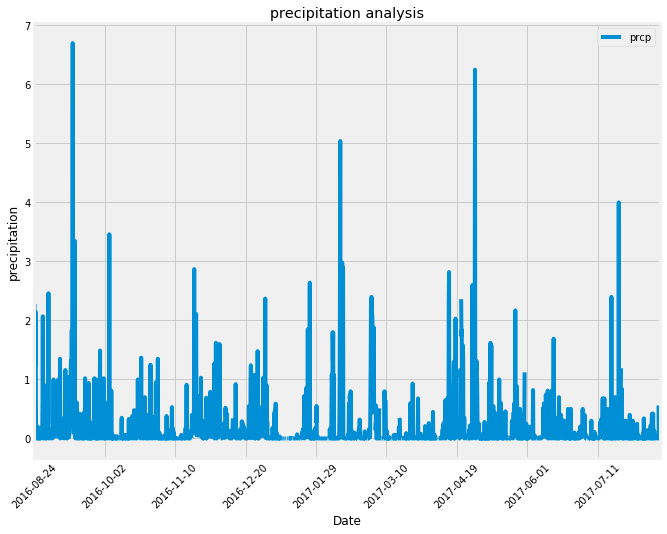

In [21]:
prcp_last12.plot('date','prcp',figsize=(10,8))
plt.xlabel("Date")
plt.ylabel("precipitation")
plt.xticks(rotation=45)
plt.title("precipitation analysis")
plt.legend(loc="best")
plt.show()

![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_last12.rename(columns = {'prcp':'precipitation'}) 
prcp_last12.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [23]:
# Design a query to show how many stations are available in this dataset?
st = session.query(Measurement).group_by(Measurement.station).count()
st

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

result = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
#most_active = result[0][0]
most_active_st = result[0][0]
print(most_active_st)
result

USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_result = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station==most_active_st).all()
temp_result

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [26]:
temp_result_station = temp_result[0][0]
temp_result_station

'USC00519281'

In [27]:
last_12mo = session.query(Measurement.tobs,Measurement.date).\
filter(Measurement.station == temp_result_station).filter(Measurement.date>first_day).order_by(Measurement.date).all()
last_12mo

[(77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '20

In [28]:
temp_data = []
for month in last_12mo:
    row = {}
    row['date'] = month.date
    row['tobs'] = month.tobs
    temp_data.append(row)
temp_df = pd.DataFrame(temp_data)
temp_df.head()


,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


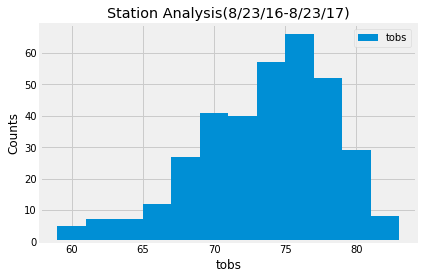

In [32]:
plt.hist(temp_df['tobs'],label='tobs', bins=12)
plt.xlabel("tobs")
plt.ylabel('Counts')
plt.title("Station Analysis(8/23/16-8/23/17)")
plt.legend(loc="best")
plt.show()

![precipitation](Images/station-histogram.png)

In [82]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [69]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = '2017-02-28'
end_date = '2017-02-30'
temp_trip = calc_temps(start_date, end_date )
print(calc_temps(start_date, end_date ))


[(69.0, 72.28571428571429, 74.0)]


In [70]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_df = pd.DataFrame(temp_trip, columns=['tmin', 'tavg', 'tmax'])
temp_df

,tmin,tavg,tmax
0,69.0,72.285714,74.0


In [71]:
y_error = temp_df['tmax']-temp_df['tmin']
y_error

0    5.0
dtype: float64

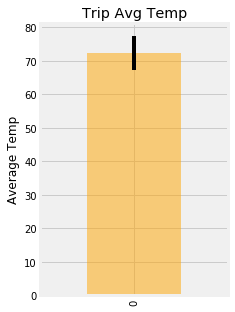

In [72]:

y_error = temp_df['tmax']-temp_df['tmin']
temp_df['tavg'].plot(kind='bar', figsize = (3,5) , yerr=y_error, alpha=0.5 ,color="orange")

plt.ylabel("Average Temp")
plt.title("Trip Avg Temp")
plt.show()

In [73]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prc_data = session.query(Measurement.station, Station.latitude, Station.longitude, Station.elevation, func.count(Measurement.prcp)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station).\
filter(Measurement.date.between(start_date, end_date)).order_by(func.count(Measurement.prcp).desc()).all()


prc_df = pd.DataFrame(prc_data, columns=['station','latitude', 'longitude', 'elevation','total rainfall'])
prc_df

,station,latitude,longitude,elevation,total rainfall
0,USC00513117,21.42340,-157.80150,14.6,1
1,USC00514830,21.52130,-157.83740,7.0,1
2,USC00516128,21.33310,-157.80250,152.4,1
3,USC00519281,21.45167,-157.84889,32.9,1
4,USC00519397,21.27160,-157.81680,3.0,1
5,USC00519523,21.33556,-157.71139,19.5,1
6,USC00517948,21.39340,-157.97510,11.9,0


## Optional Challenge Assignment

In [74]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [75]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [38]:
# Plot the daily normals as an area plot with `stacked=False`
